# EDA of retail transaction dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['figure.figsize'] = [16, 8]

In [11]:
data= '../data/dataset01_sfu_hierarchical_forecast_project.csv'
df = pd.read_csv(data,)# index_col='Unnamed: 0')


In [3]:
df

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales
0,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081
1,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081
2,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081
3,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081
4,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081
5,6,2012,1,1,province1,city20,store60,category1,department1,class7,vendor2,size33,1.0,424.971081
6,7,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size36,-1.0,-679.953729
7,8,2012,1,1,province3,city49,store46,category1,department1,class7,vendor2,size36,1.0,424.971081
8,9,2012,1,1,province2,city4,store1,category1,department1,class7,vendor3,size26,1.0,207.128762
9,10,2012,1,1,province2,city16,store2,category1,department1,class7,vendor3,size26,3.0,672.811358


In [12]:
df['time'] = df['year'].astype(str) + " " + df['week'].astype(str) + " 0"
df['time'] = pd.to_datetime(df['time'], format="%Y %W %w")
df = df.set_index(df['time'])
df = df.drop(columns='time')
df

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales
time,,,,,,,,,,,,,,
2012-01-08,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081
2012-01-08,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081
2012-01-08,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-07,2639097,2018,1,1,province2,city12,store31,category2,department12,class41,vendor11,size1,2.0,85.708453
2018-01-07,2639098,2018,1,1,province1,city39,store43,category2,department12,class41,vendor11,size1,2.0,85.708453
2018-01-07,2639099,2018,1,1,province1,city23,store56,category2,department12,class41,vendor11,size1,1.0,42.854227


In [5]:
# Necessary package for determining whether a day falls on a Canadian Federal Holiday.
# !~/anaconda3/bin/conda install workalendar

In [6]:
# !~/anaconda3/bin/conda list
# !which python

df.to_csv('../data/dataset-02.csv')

In [3]:
df = pd.read_csv("../data/dataset-02.csv")
df = df.set_index(df.time)
df = df.drop(columns="time")
df.head()

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales
time,,,,,,,,,,,,,,
2012-01-08,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081
2012-01-08,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081
2012-01-08,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081


In [13]:
# make time series model for stor1 and class1 records
data1 = df[(df["store"] == "store1") & (df["class"] == "class1")]

In [14]:
data1 = data1.groupby(data1.index).agg({'totalSales':'sum'})

In [15]:
data1.shape

(313, 1)

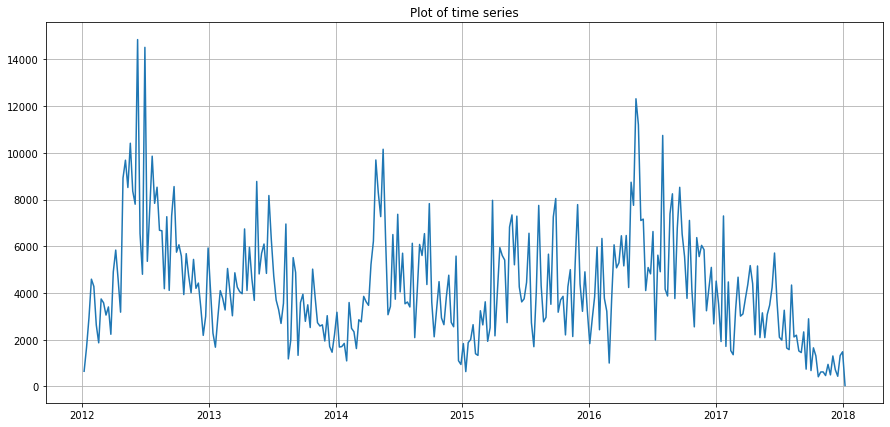

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(data1.totalSales)
plt.title('Plot of time series')
# plt.xticks(data1.index)
plt.grid(True)
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data1["totalSales"], autolag="AIC")
result

(-4.144025540223258,
 0.0008183718562087774,
 2,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 5301.188441446367)

test statistic is -4.1 which is lower than each critical values at different levels(1%, 5% and 10%)
So we can reject the null hypothesis. So series is stationary

ACF

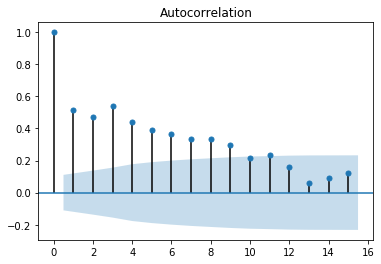

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1["totalSales"], lags=15)
plt.show()

PACF

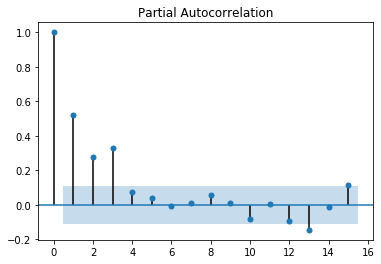

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data1["totalSales"], lags=15)
plt.show()

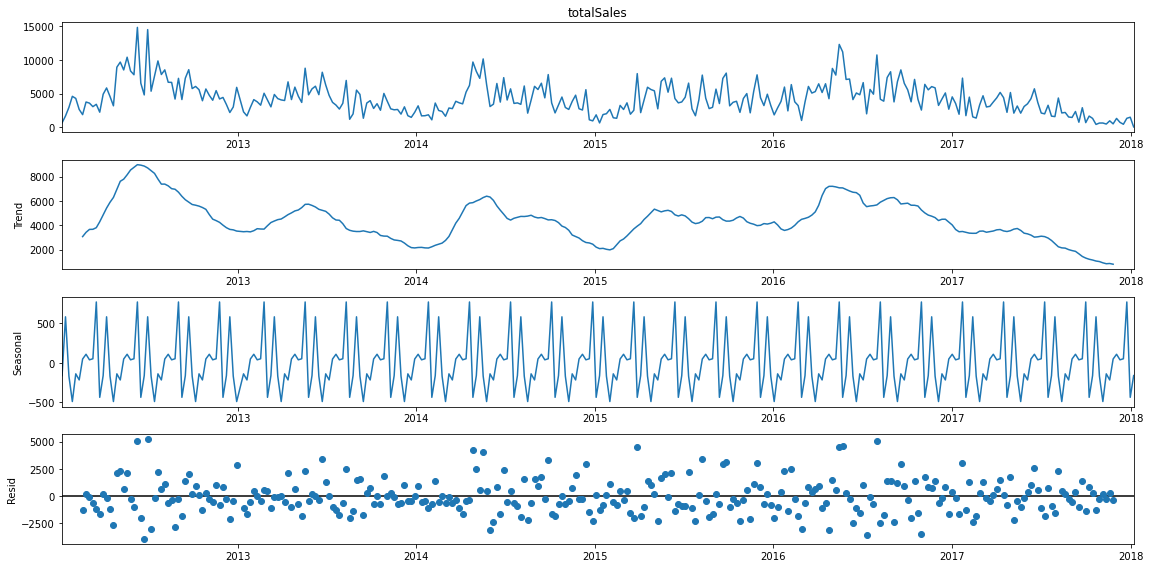

In [61]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

index = pd.DatetimeIndex(data1.index)
df1 = data1.set_index(index)
decom = sm.tsa.seasonal_decompose(data1["totalSales"], period=12) # 12 = 4*3 quarterly seasonality
fig =  decom.plot()


Make Auto ARIMA model 

In [45]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

# Load/split your data
y = data1
train, test = train_test_split(y, train_size=250)

# Define and fit your pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

# Serialize your model just like you would in scikit:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

# Load it and make predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    print(mod.predict(15))

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(1, 0, 1, 12) (constant=True); AIC=1601.006, BIC=1629.178, Time=9.033 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=True); AIC=1691.906, BIC=1698.949, Time=0.079 seconds
Fit ARIMA: (1, 0, 0)x(1, 0, 0, 12) (constant=True); AIC=1623.714, BIC=1637.800, Time=1.482 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 1, 12) (constant=True); AIC=1644.659, BIC=1658.745, Time=0.641 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=False); AIC=2565.811, BIC=2569.333, Time=0.058 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 1, 12) (constant=True); AIC=1595.967, BIC=1620.617, Time=3.720 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 12) (constant=True); AIC=1593.971, BIC=1615.099, Time=1.422 seconds
Fit ARIMA: (2, 0, 2)x(1, 0, 0, 12) (constant=True); AIC=1596.247, BIC=1620.897, Time=4.824 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 12) (constant=True); AIC=1595.407, BIC=1613.014, Time=1.242 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 12) (constant=True); AIC=1595.408,

C:\Users\SONY\Anaconda3\envs\time_series\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\SONY\Anaconda3\envs\time_series\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


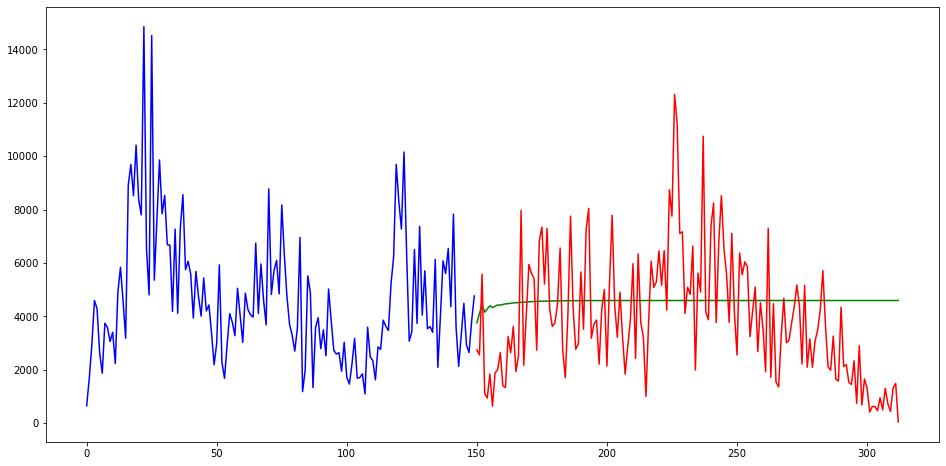

In [60]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = data1
train_size = 150
train, test = train_test_split(y, train_size=train_size)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=4, max_q=12, max_P=12, max_Q=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:train_size], train, c='blue')
plt.plot(x[train_size:], forecasts, c='green')
plt.plot(x[train_size:], test, c='red')
plt.show()

ARIMA model

predicted=4675.763162, expected=3231.922926
predicted=3739.591852, expected=1829.018393
predicted=3345.124071, expected=2873.375896
predicted=2883.823462, expected=3839.524436
predicted=2950.106900, expected=5967.951025
predicted=3941.413838, expected=2423.263669
predicted=3359.852277, expected=6333.711850
predicted=5394.320266, expected=3772.671842
predicted=3421.758974, expected=3215.352625
predicted=4797.607041, expected=997.003583
predicted=2396.767281, expected=3736.602868
predicted=3418.932785, expected=6060.730426
predicted=2874.527210, expected=5075.440332
predicted=4410.490001, expected=5294.425430
predicted=4983.916195, expected=6449.346838
predicted=5630.320961, expected=5159.148921
predicted=5185.225303, expected=6460.274666
predicted=5856.027635, expected=4233.569050
predicted=4893.960987, expected=8741.976540
predicted=6854.805437, expected=7753.258107
predicted=6226.668585, expected=12316.733278
predicted=9627.484983, expected=11205.523182
predicted=9627.914035, expected

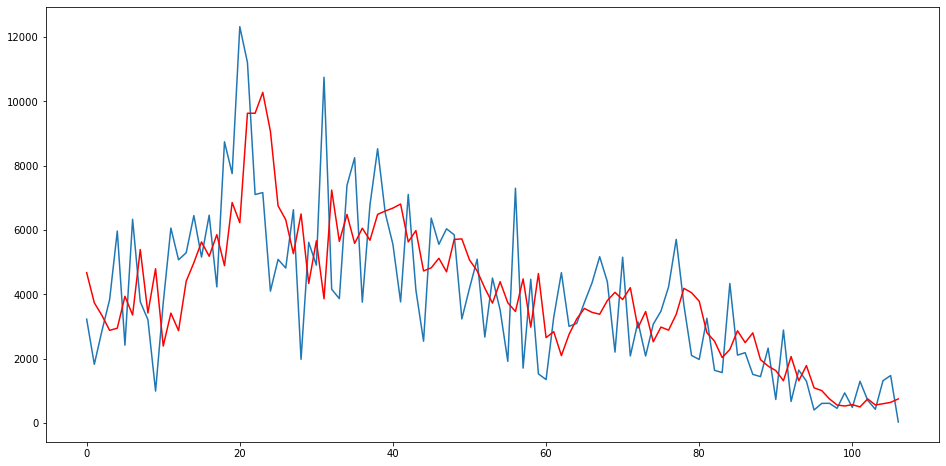

In [71]:
# from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = data1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,2,9))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

LSTM Model

In [146]:
#Now lets train 
train_row = data1.values
X = train_row[0:311]
y = train_row[1:312]


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X,(-1,1))
y_train = np.reshape(y,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)
# y_train = sc.transform(y_train)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
X_train, X_test, y_train, y_test = X_train[:217], X_train[217:], y_train[:217], y_train[217:]

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (217,1,1))


# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 500, verbose = 2, validation_split=0.1,)

# Getting the predicted total Sales
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = np.reshape(inputs, (94, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test)


Train on 195 samples, validate on 22 samples
Epoch 1/500
 - 4s - loss: 0.1214 - val_loss: 0.0719
Epoch 2/500
 - 0s - loss: 0.1019 - val_loss: 0.0582
Epoch 3/500
 - 0s - loss: 0.0866 - val_loss: 0.0476
Epoch 4/500
 - 0s - loss: 0.0742 - val_loss: 0.0398
Epoch 5/500
 - 0s - loss: 0.0648 - val_loss: 0.0334
Epoch 6/500
 - 0s - loss: 0.0566 - val_loss: 0.0282
Epoch 7/500
 - 0s - loss: 0.0497 - val_loss: 0.0240
Epoch 8/500
 - 0s - loss: 0.0440 - val_loss: 0.0205
Epoch 9/500
 - 0s - loss: 0.0392 - val_loss: 0.0177
Epoch 10/500
 - 0s - loss: 0.0352 - val_loss: 0.0156
Epoch 11/500
 - 0s - loss: 0.0321 - val_loss: 0.0142
Epoch 12/500
 - 0s - loss: 0.0296 - val_loss: 0.0134
Epoch 13/500
 - 0s - loss: 0.0278 - val_loss: 0.0128
Epoch 14/500
 - 0s - loss: 0.0263 - val_loss: 0.0127
Epoch 15/500
 - 0s - loss: 0.0254 - val_loss: 0.0127
Epoch 16/500
 - 0s - loss: 0.0248 - val_loss: 0.0129
Epoch 17/500
 - 0s - loss: 0.0244 - val_loss: 0.0131
Epoch 18/500
 - 0s - loss: 0.0243 - val_loss: 0.0134
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.0204 - val_loss: 0.0150
Epoch 155/500
 - 0s - loss: 0.0204 - val_loss: 0.0150
Epoch 156/500
 - 0s - loss: 0.0204 - val_loss: 0.0150
Epoch 157/500
 - 0s - loss: 0.0204 - val_loss: 0.0150
Epoch 158/500
 - 0s - loss: 0.0205 - val_loss: 0.0152
Epoch 159/500
 - 0s - loss: 0.0204 - val_loss: 0.0150
Epoch 160/500
 - 0s - loss: 0.0204 - val_loss: 0.0151
Epoch 161/500
 - 0s - loss: 0.0204 - val_loss: 0.0151
Epoch 162/500
 - 0s - loss: 0.0204 - val_loss: 0.0152
Epoch 163/500
 - 0s - loss: 0.0204 - val_loss: 0.0152
Epoch 164/500
 - 0s - loss: 0.0204 - val_loss: 0.0151
Epoch 165/500
 - 0s - loss: 0.0204 - val_loss: 0.0151
Epoch 166/500
 - 0s - loss: 0.0203 - val_loss: 0.0151
Epoch 167/500
 - 0s - loss: 0.0203 - val_loss: 0.0151
Epoch 168/500
 - 0s - loss: 0.0204 - val_loss: 0.0152
Epoch 169/500
 - 0s - loss: 0.0203 - val_loss: 0.0151
Epoch 170/500
 - 0s - loss: 0.0203 - val_loss: 0.0152
Epoch 171/500
 - 0s - loss: 0.0203 - val_loss: 0.0152
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0196 - val_loss: 0.0161
Epoch 307/500
 - 0s - loss: 0.0197 - val_loss: 0.0161
Epoch 308/500
 - 0s - loss: 0.0196 - val_loss: 0.0161
Epoch 309/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 310/500
 - 0s - loss: 0.0196 - val_loss: 0.0161
Epoch 311/500
 - 0s - loss: 0.0196 - val_loss: 0.0161
Epoch 312/500
 - 0s - loss: 0.0197 - val_loss: 0.0162
Epoch 313/500
 - 0s - loss: 0.0196 - val_loss: 0.0161
Epoch 314/500
 - 0s - loss: 0.0196 - val_loss: 0.0160
Epoch 315/500
 - 0s - loss: 0.0196 - val_loss: 0.0161
Epoch 316/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 317/500
 - 0s - loss: 0.0197 - val_loss: 0.0160
Epoch 318/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 319/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 320/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 321/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 322/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 323/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 459/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 460/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 461/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 462/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 463/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 464/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 465/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 466/500
 - 0s - loss: 0.0197 - val_loss: 0.0162
Epoch 467/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 468/500
 - 0s - loss: 0.0197 - val_loss: 0.0165
Epoch 469/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 470/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 471/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 472/500
 - 0s - loss: 0.0196 - val_loss: 0.0162
Epoch 473/500
 - 0s - loss: 0.0196 - val_loss: 0.0163
Epoch 474/500
 - 0s - loss: 0.0197 - val_loss: 0.0162
Epoch 475/500
 - 0s - loss: 0.0197 - val_loss: 0.0161
Epoch 476/500
 - 0s - loss: 

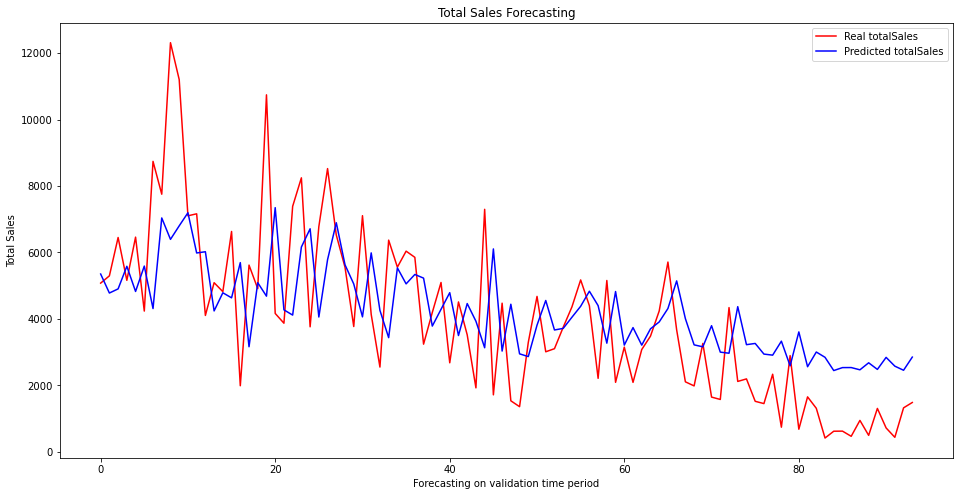

In [149]:
#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real totalSales')
plt.plot(y_pred, color = 'blue', label = 'Predicted totalSales')
plt.title('Total Sales Forecasting')
plt.xlabel('Forecasting on validation time period')
plt.ylabel('Total Sales')
plt.legend()
plt.show()